Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       105
           1       0.82      0.62      0.71        74

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



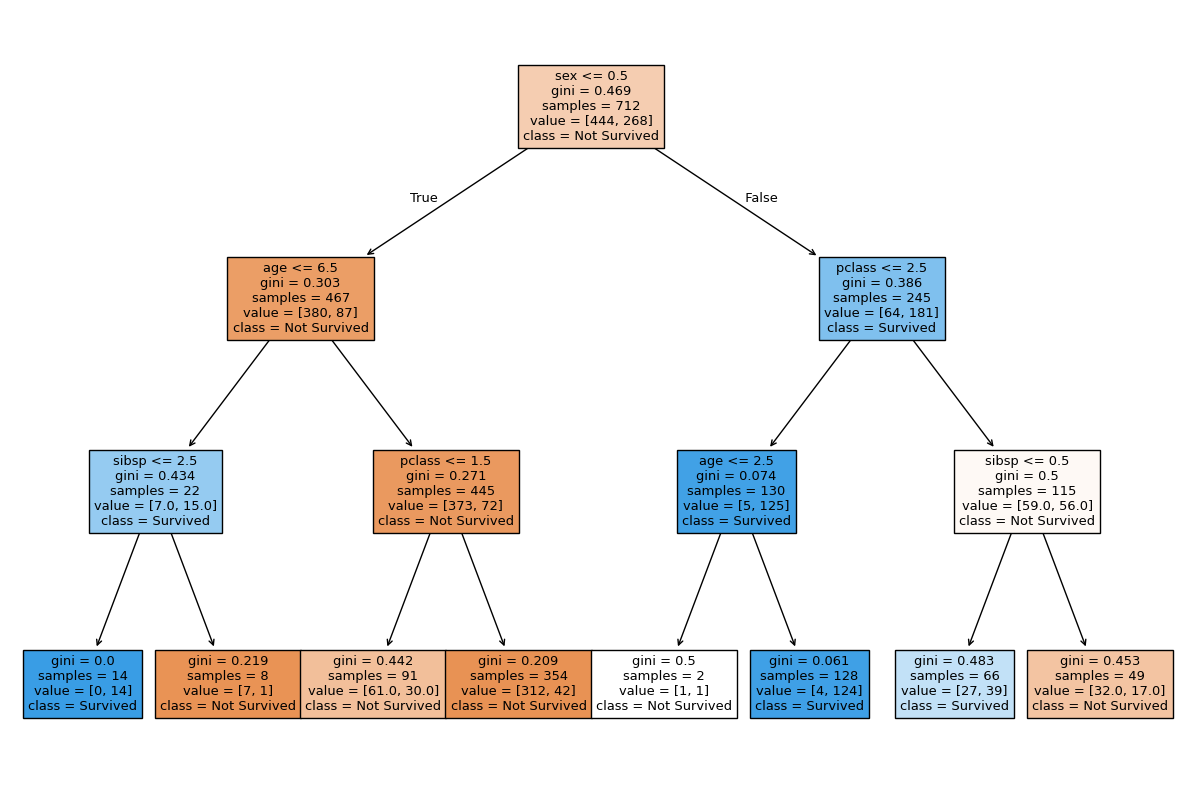

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Load Dataset
df = sns.load_dataset('titanic')

# 2. Preprocessing
# Memilih fitur yang relevan dan menghapus baris dengan nilai kosong
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch']]
df['age'] = df['age'].fillna(df['age'].median())
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

X = df.drop('survived', axis=1)
y = df['survived']

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Bangun Model Decision Tree
model = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

# Visualisasi Pohon
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# Bagian Baru